Vamos começar esta aula sobre regressão logística usando um problema de classificação binária simples: como prever se um aluno será aprovado ou não com base em horas de estudo.

* **Variável independente (X):** Horas de estudo.
* **Variável dependente (y):** Aprovado (1) ou Reprovado (0).

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

dados = {
    "Horas_Estudo": [1, 2, 3, 4, 5, 6],
    "Aprovado": [0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(dados)
df

,Horas_Estudo,Aprovado
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,6,1


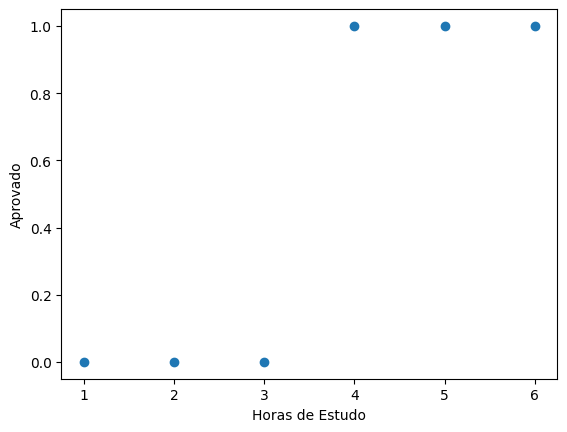

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df["Horas_Estudo"], df["Aprovado"])
plt.xlabel("Horas de Estudo")
plt.ylabel("Aprovado")
plt.show()

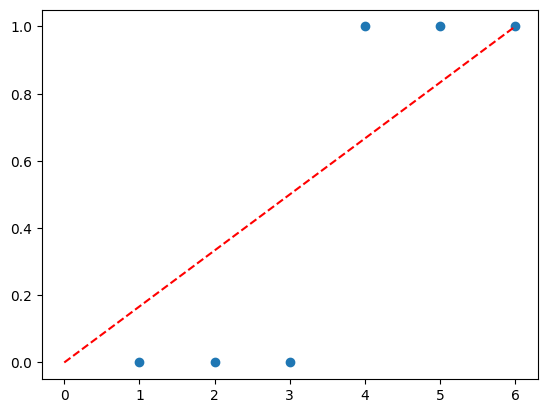

In [30]:
plt.scatter(df["Horas_Estudo"], df["Aprovado"])
plt.plot([0, 6], [0, 1], color="red", linestyle='--')
plt.show()

## Passo 1: Função Logística
$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$

**Coeficientes hipotéticos**:
- $\beta_0 = -5 $
- $\beta_1 = 1.5 $

---

## Passo 2: Cálculo para X=4
$ z = -5 + 1.5 \times 4 = 1 $

$ P(y=1) = \frac{1}{1 + e^{-1}} $

**Contas passo a passo**:

 $ e^{-1} \approx 0.3679 $

 $ 1 + 0.3679 = 1.3679 $

 $ \frac{1}{1.3679} \approx 0.731 $


**Resultado**:
- Probabilidade de aprovação para 4 horas de estudo ≈ **73.1%**

---

## Passo 3: Ponto de Decisão (50%)
Encontre $X$ onde $ P(y=1) = 0.5$:

$ -5 + 1.5X = 0 $

$ 1.5X = 5 $

$ X = \frac{5}{1.5} \approx 3.33 $

**Interpretação**:
- Alunos que estudam **mais de 3.33 horas** têm >50% de chance de aprovação.


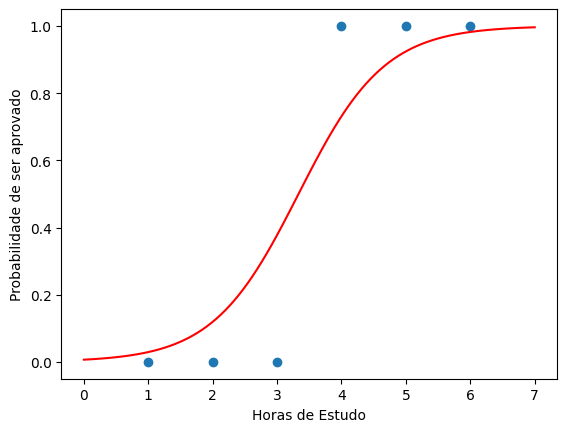

In [31]:
import numpy as np

x_curva = np.linspace(0, 7, 100)
probabilidade = 1 / (1 + np.exp(-(-5 + 1.5 * x_curva)))

plt.scatter(df["Horas_Estudo"], df["Aprovado"])
plt.plot(x_curva, probabilidade, color="red", linestyle='solid')
plt.xlabel("Horas de Estudo")
plt.ylabel("Probabilidade de ser aprovado")
plt.show()

In [32]:
# treinamento da regressão logística

from sklearn.linear_model import LogisticRegression

x = df["Horas_Estudo"].values.reshape(-1, 1)
y = df["Aprovado"]

modelo = LogisticRegression()
modelo.fit(x, y)



LogisticRegression()

In [33]:
print("Coeficientes: ", modelo.coef_[0][0])
print("Intercepto: ", modelo.intercept_[0])

Coeficientes:  1.1206952510393666
Intercepto:  -3.9223038967769632


**Exercício:** Dado que agora encontramos os coeficientes reais dos dados, calcule manualmente: Encontre $X$ onde $ P(y=1) = 0.5$:

$ -3.922 + 1.12X = 0 $

$ 1.12X = 3.922 $

$ X = \frac{3.922}{1.12} \approx 3.5 $

**Interpretação**:
- Alunos que estudam **mais de 3.5 horas** têm >50% de chance de aprovação.


In [34]:
# A partir do modelo de regressão logística induzido, vamos fazer a previsão

print(f"Probabilidade de aprovação para 1 horas de estudo: {modelo.predict_proba([[1]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[1]])[0][1] * 100 : 0.2f}%")
print(f"Probabilidade de aprovação para 2 horas de estudo: {modelo.predict_proba([[2]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[2]])[0][1] * 100 : 0.2f}%")
print(f"Probabilidade de aprovação para 3 horas de estudo: {modelo.predict_proba([[3]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[3]])[0][1] * 100 : 0.2f}%")
print(f"Probabilidade de aprovação para 4 horas de estudo: {modelo.predict_proba([[4]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[4]])[0][1] * 100 : 0.2f}%")
print(f"Probabilidade de aprovação para 5 horas de estudo: {modelo.predict_proba([[5]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[5]])[0][1] * 100 : 0.2f}%")
print(f"Probabilidade de aprovação para 6 horas de estudo: {modelo.predict_proba([[6]])[0][1]:0.4f} ➡️ {modelo.predict_proba([[6]])[0][1] * 100 : 0.2f}%")


Probabilidade de aprovação para 1 horas de estudo: 0.0572 ➡️  5.72%
Probabilidade de aprovação para 2 horas de estudo: 0.1570 ➡️  15.70%
Probabilidade de aprovação para 3 horas de estudo: 0.3635 ➡️  36.35%
Probabilidade de aprovação para 4 horas de estudo: 0.6366 ➡️  63.66%
Probabilidade de aprovação para 5 horas de estudo: 0.8431 ➡️  84.31%
Probabilidade de aprovação para 6 horas de estudo: 0.9428 ➡️  94.28%


In [35]:
dados_teste = {
    "Horas_Estudo": [6.5, 3.5, 4.5, 1.5, 5.5],
    "Aprovado_REAL": [0, 1, 1, 0, 1]
}

df_teste = pd.DataFrame(dados_teste)

In [36]:
# previsões

x_teste = df_teste["Horas_Estudo"].values.reshape(-1, 1)
df_teste['Aprovado_PREVISTO'] = modelo.predict(x_teste)
df_teste['Probabilidade_Aprovação'] = modelo.predict_proba(x_teste)[:, 1]

df_teste


,Horas_Estudo,Aprovado_REAL,Aprovado_PREVISTO,Probabilidade_Aprovação
0,6.5,0,1,0.966503
1,3.5,1,1,0.500032
2,4.5,1,1,0.754142
3,1.5,0,0,0.096106
4,5.5,1,1,0.903917


In [37]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(df_teste["Aprovado_REAL"], df_teste["Aprovado_PREVISTO"])
print(f"Acurácia do modelo: {acuracia * 100 : 0.2f}% ✅")

Acurácia do modelo:  80.00% ✅


**Exercício 1:** Carregue os datasets ``dados_aprovacao_treino.csv`` e ``dados_aprovacao_teste.csv``. Analise quais são as colunas existentes e faça o treinamento do algoritmos de regressão logística. Em seguida, faça o teste do modelo de regressão induzido, utilizando o conjunto de dados de teste.

**Exercício 2:** avalie a necessidade de aplicar algum pré-processamento nos dados (identificação de outliers, normalização, desbalanceamento das classes, etc.) Em caso afirmativo, retreine e reavalie o modelo novamente. Lembre-se que o pré-processamento também precisa ser aplicado nos dados de teste.
Caso você verifique que nada disso é necessário, tente justificar o porquê.

Dicas:

* a regressão logísitca é robusta contra valores com escalas diferentes, ou seja, normalizar os dados tende a não ter tanto impacto assim neste algoritmo. Entretanto, isso não se aplica quando usamos regularização na regressão. Pesquise e estude mais sobre isso.

* a regressão logísitica também é robusta à outliers, mas não à prova. Então, sempre é válido averiguar sua existência

* ela é sensível ao desbalanceamento das classes. Se esse for o caso, pesquise e teste a biblioteca SMOTE que faz uma amostragem de forma facilitada.
  * from imblearn.over_sampling import SMOTE

In [38]:
df_teste = pd.read_csv("../data/dados_aprovacao_2variaveis_treino.csv")
df_treino = pd.read_csv("../data/dados_aprovacao_2variaveis_treino.csv")

df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Horas_Estudo          500 non-null    float64
 1   Simulados_Realizados  500 non-null    int64  
 2   Aprovado              500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [39]:
df_treino.head()

,Horas_Estudo,Simulados_Realizados,Aprovado
0,6.0,7,1
1,4.7,5,1
2,6.3,9,1
3,8.0,9,1
4,4.5,6,1


In [40]:
x_treino = df_treino[["Horas_Estudo", "Simulados_Realizados"]].values.reshape(-1, 2)
y_treino = df_treino["Aprovado"]

modelo_aprovacao = LogisticRegression()
modelo_aprovacao.fit(x_treino, y_treino)

LogisticRegression()

In [41]:
df_teste.head()

,Horas_Estudo,Simulados_Realizados,Aprovado
0,6.0,7,1
1,4.7,5,1
2,6.3,9,1
3,8.0,9,1
4,4.5,6,1


In [42]:
x_teste = df_teste[["Horas_Estudo", "Simulados_Realizados"]].values.reshape(-1, 2)

previsoes = modelo_aprovacao.predict(x_teste)
probabilidades = modelo_aprovacao.predict_proba(x_teste)[:, 1]

df_teste["Aprovado_PREVISTO"] = previsoes
df_teste["Probabilidade_Aprovação"] = probabilidades

df_teste.head()

,Horas_Estudo,Simulados_Realizados,Aprovado,Aprovado_PREVISTO,Probabilidade_Aprovação
0,6.0,7,1,1,0.943017
1,4.7,5,1,1,0.803346
2,6.3,9,1,1,0.970480
3,8.0,9,1,1,0.991024
4,4.5,6,1,1,0.817742


In [43]:
acuracia = accuracy_score(df_teste["Aprovado"], df_teste["Aprovado_PREVISTO"])
print(f"Acurácia do modelo: {acuracia * 100 : 0.2f}% ✅")

Acurácia do modelo:  86.60% ✅


In [44]:
print("Coeficiente_1: ", modelo_aprovacao.coef_[0][0])
print("Coeficiente_2: ", modelo_aprovacao.coef_[0][1])
print("Intercepto: ", modelo_aprovacao.intercept_[0])


Coeficiente_1:  0.7126098508225635
Coeficiente_2:  0.23630227050890074
Intercepto:  -3.1234363593747227
